In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import cifar10 
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

170500096/170498071 [==============================] - 35s 0us/step


In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [0]:
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range = 0.05, 
            width_shift_range=0.07,
            height_shift_range=0.07,
            horizontal_flip=False,
            vertical_flip=False, 
            data_format="channels_last",
            zca_whitening=True)
        # fit data for zca whitening
image_generator.fit(x_train, augment=True)
        # get transformed images
randidx = np.random.randint(x_train.shape[0],size=30000)
x_augmented = x_train[randidx].copy()
y_augmented = y_train[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(30000),
                                    batch_size=30000, shuffle=False).next()[0]
 
x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))
        #self.train_size = self.x_train.shape[0]
        #self.test_size = self.x_test.shape[0]

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [0]:
x_train.shape
y_train.shape

(80000, 1)

In [0]:
 # conv1
  with tf.variable_scope('conv1') as scope:
    kernel = _variable_with_weight_decay('weights',
                                         shape=[5, 5, 3, 64],
                                         stddev=5e-2,
                                         wd=None)
    conv = tf.nn.conv2d(images, kernel, [1, 1, 1, 1], padding='SAME')
    biases = _variable_on_cpu('biases', [64], tf.constant_initializer(0.0))
    pre_activation = tf.nn.bias_add(conv, biases)
    conv1 = tf.nn.relu(pre_activation, name=scope.name)
    _activation_summary(conv1)

  # pool1
  pool1 = tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1],
                         padding='SAME', name='pool1')
  # norm1
  norm1 = tf.nn.lrn(pool1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,
                    name='norm1')

  # conv2
  with tf.variable_scope('conv2') as scope:
    kernel = _variable_with_weight_decay('weights',
                                         shape=[5, 5, 64, 64],
                                         stddev=5e-2,
                                         wd=None)
    conv = tf.nn.conv2d(norm1, kernel, [1, 1, 1, 1], padding='SAME')
    biases = _variable_on_cpu('biases', [64], tf.constant_initializer(0.1))
    pre_activation = tf.nn.bias_add(conv, biases)
    conv2 = tf.nn.relu(pre_activation, name=scope.name)
    _activation_summary(conv2)

  # norm2
  norm2 = tf.nn.lrn(conv2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75,
                    name='norm2')
  # pool2
  pool2 = tf.nn.max_pool(norm2, ksize=[1, 3, 3, 1],
                         strides=[1, 2, 2, 1], padding='SAME', name='pool2')

  # local3
  with tf.variable_scope('local3') as scope:
    # Move everything into depth so we can perform a single matrix multiply.
    reshape = tf.reshape(pool2, [images.get_shape().as_list()[0], -1])
    dim = reshape.get_shape()[1].value
    weights = _variable_with_weight_decay('weights', shape=[dim, 384],
                                          stddev=0.04, wd=0.004)
    biases = _variable_on_cpu('biases', [384], tf.constant_initializer(0.1))
    local3 = tf.nn.relu(tf.matmul(reshape, weights) + biases, name=scope.name)
    _activation_summary(local3)

  # local4
  with tf.variable_scope('local4') as scope:
    weights = _variable_with_weight_decay('weights', shape=[384, 192],
                                          stddev=0.04, wd=0.004)
    biases = _variable_on_cpu('biases', [192], tf.constant_initializer(0.1))
    local4 = tf.nn.relu(tf.matmul(local3, weights) + biases, name=scope.name)
    _activation_summary(local4)

  # linear layer(WX + b),
  # We don't apply softmax here because
  # tf.nn.sparse_softmax_cross_entropy_with_logits accepts the unscaled logits
  # and performs the softmax internally for efficiency.
  with tf.variable_scope('softmax_linear') as scope:
    weights = _variable_with_weight_decay('weights', [192, NUM_CLASSES],
                                          stddev=1/192.0, wd=None)
    biases = _variable_on_cpu('biases', [NUM_CLASSES],
                              tf.constant_initializer(0.0))
    softmax_linear = tf.add(tf.matmul(local4, weights), biases, name=scope.name)
    _activation_summary(softmax_linear)

In [0]:


sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, [None, 32,32,3])
#x_image = tf.reshape(x, [-1, 32, 32, 3])

In [0]:
#sess = tf.InteractiveSession()

#L2 Regularization

regularizer = tf.contrib.layers.l2_regularizer(scale=1e-4)

#Convolution Layer
conv1 = tf.layers.conv2d(
      inputs=x,
      filters=16,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu,
      kernel_regularizer=regularizer )

#Pooling Layer
pool1=tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')


#Batch Normalization
norm1 = tf.layers.batch_normalization(pool1)



regularizer = tf.contrib.layers.l2_regularizer(scale=1e-4)


#convolution Layer
conv2 = tf.layers.conv2d(
      inputs=norm1,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu,
      kernel_regularizer=regularizer )


# Batch normalization
norm2 = tf.layers.batch_normalization(conv2)


pool2 = tf.nn.max_pool(norm2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')



dense_flat=tf.reshape(pool2,[-1,8*8*32])

#Fully Connected Layers

output_dense = tf.layers.dense(inputs=dense_flat, units=384, activation=tf.nn.relu)


y_conv_1 = tf.layers.dense(inputs=output_dense, units=192, activation=tf.nn.relu)

y_conv = tf.layers.dense(inputs=y_conv_1, units=10, activation=None)



y_ = tf.placeholder(tf.float32, [None, 10])



In [0]:
# model training
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y_conv) + tf.losses.get_regularization_loss()

#cross_entropy = -tf.reduce_sum(y_ * tf.log(y_conv)) + tf.losses.get_regularization_loss()
learning_rate=tf.placeholder(tf.float32, [])
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
accuracy_summary = tf.summary.scalar("Train_Accuracy", accuracy)
accuracy_summary_validation = tf.summary.scalar("Validation_Accuracy", accuracy)
test_writer  = tf.summary.FileWriter('./please')

sess.run(tf.global_variables_initializer())

In [0]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
for i in range(7000):
    batch = next_batch(100,x_train,y_train)
   
    if i % 100 == 0:
        # accuacy on test
        #print("step %d, test accuracy %g"%(i, accuracy.eval(feed_dict={x: x_test, y_: y_test})))
        summary, acc = sess.run([accuracy_summary, accuracy], feed_dict={x: batch[0], y_: batch[1]})
        
        
        summary_validation, acc = sess.run([accuracy_summary_validation, accuracy], feed_dict={x: x_val, y_: y_val})
        test_writer.add_summary(summary, i)
        test_writer.add_summary(summary_validation, i)
        
    if i > 2000:
       
        train_step.run(feed_dict = {x: batch[0], y_: batch[1],learning_rate:0.000001})
        continue
    
    train_step.run(feed_dict = {x: batch[0], y_: batch[1],learning_rate:0.001})


step 0, test accuracy 0.0934
step 100, test accuracy 0.4606
step 200, test accuracy 0.5328
step 300, test accuracy 0.5687
step 400, test accuracy 0.6029
step 500, test accuracy 0.6289
step 600, test accuracy 0.632
step 700, test accuracy 0.6555
step 800, test accuracy 0.6606
step 900, test accuracy 0.6594
step 1000, test accuracy 0.6834
step 1100, test accuracy 0.6856
step 1200, test accuracy 0.6763
step 1300, test accuracy 0.676
step 1400, test accuracy 0.696
step 1500, test accuracy 0.7023
step 1600, test accuracy 0.7002
step 1700, test accuracy 0.7021
step 1800, test accuracy 0.703
step 1900, test accuracy 0.702
step 2000, test accuracy 0.7031
step 2100, test accuracy 0.7049
step 2200, test accuracy 0.7067
step 2300, test accuracy 0.7075
step 2400, test accuracy 0.7088
step 2500, test accuracy 0.71
step 2600, test accuracy 0.7109
step 2700, test accuracy 0.7123
step 2800, test accuracy 0.7133
step 2900, test accuracy 0.7145
step 3000, test accuracy 0.7146
step 3100, test accuracy 0.

In [0]:
# overall accuacy on test
print("test accuracy %g"%(accuracy.eval(feed_dict={x: x_test, y_: y_test})))
test_writer.close()

test accuracy 0.7146


In [0]:
#Tutorial    
#tRAIN Best Accuracy:87.89 after 6900 batches
# Val best accuracy:72.83% after 6900 batches
#Test :72.67.85%



#CHANGE    
#tRAIN Best Accuracy:82.39 after 6900 batches
# Val best accuracy:72.32% after 6900 batches
#Test :71.46%




LOG_DIR = './please'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

<!doctype html><!--
@license
Copyright 2016 The TensorFlow Authors. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

@license
Copyright 2017 Google Inc. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distribu
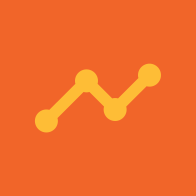
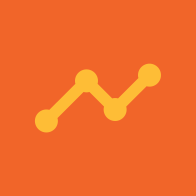

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
! curl http://localhost:6006
    


In [0]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip > /dev/null 2>&1
! unzip ngrok-stable-linux-amd64.zip > /dev/null 2>&1




In [0]:
get_ipython().system_raw('./ngrok http 6006 &')




In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://e47913b4.ngrok.io
